In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
df = pd.read_csv('data/full_dataset_with_stance_distilbert.csv')
counts = df['stance_label'].value_counts()
colors_pie = {'prorussian': '#d62728', 'neutral': '#7f7f7f', 'proukrainian': '#2ca02c'}
df.head()

,id,video_title,video_published_at,comment,stance_label
0,VLjlMo2EF8s,Retired colonel says this factor gives an adva...,2023-02-19,Get Russia out of Ukraine Now,prorussian
1,VLjlMo2EF8s,Retired colonel says this factor gives an adva...,2023-02-19,This clown is a crap military analyst,prorussian
2,VLjlMo2EF8s,Retired colonel says this factor gives an adva...,2023-02-19,CiaNN infomercial 🤡📢💩🐑,neutral
3,VLjlMo2EF8s,Retired colonel says this factor gives an adva...,2023-02-19,i cant read the subtitles. is To short tome To...,neutral
4,VLjlMo2EF8s,Retired colonel says this factor gives an adva...,2023-02-19,Do any of these experts consider that a nuclea...,prorussian


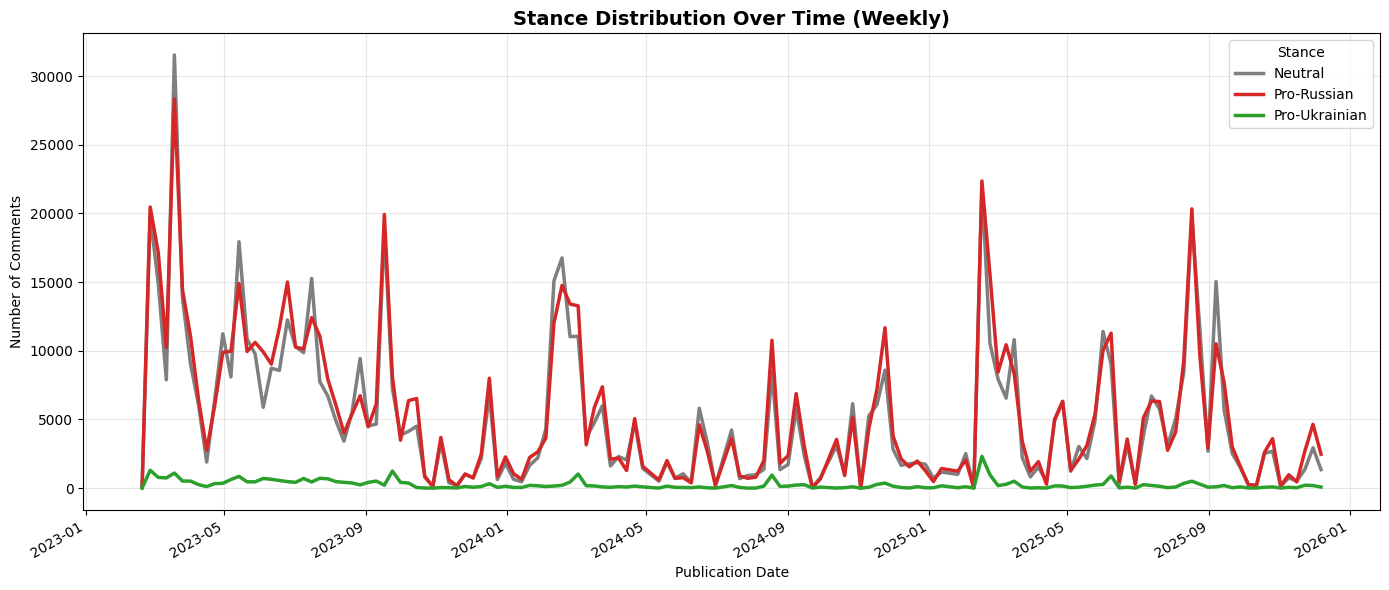

In [3]:
fig1, ax1 = plt.subplots(figsize=(14, 6))
df['video_published_at'] = pd.to_datetime(df['video_published_at'])
temporal = df.groupby([pd.Grouper(key='video_published_at', freq='W'), 'stance_label']).size().unstack(fill_value=0)
temporal.plot(ax=ax1, color=['#7f7f7f', '#d62728', '#2ca02c'], linewidth=2.5)
ax1.set_title('Stance Distribution Over Time (Weekly)', fontsize=14, fontweight='bold')
ax1.set_xlabel('Publication Date')
ax1.set_ylabel('Number of Comments')
ax1.legend(title='Stance', labels=['Neutral', 'Pro-Russian', 'Pro-Ukrainian'])
ax1.grid(alpha=0.3)
plt.tight_layout()
plt.savefig('stance_timeline.png', dpi=300, bbox_inches='tight')
plt.show()

/tmp/ipykernel_46339/592810831.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='stance_label', y='comment_length',


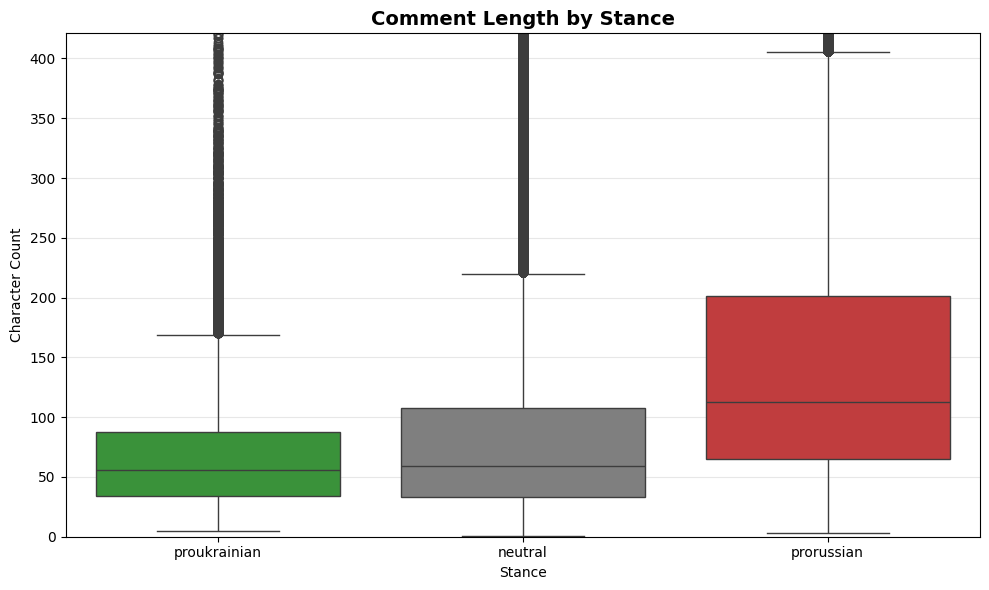

In [4]:
fig2, ax2 = plt.subplots(figsize=(10, 6))
df['comment_length'] = df['comment'].str.len()
stance_order = ['proukrainian', 'neutral', 'prorussian']
sns.boxplot(data=df, x='stance_label', y='comment_length', 
            palette=colors_pie, order=stance_order, ax=ax2)
ax2.set_title('Comment Length by Stance', fontsize=14, fontweight='bold')
ax2.set_xlabel('Stance')
ax2.set_ylabel('Character Count')
ax2.set_ylim(0, df['comment_length'].quantile(0.95))  # Remove outliers for visibility
ax2.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.savefig('stance_comment_length.png', dpi=300, bbox_inches='tight')
plt.show()

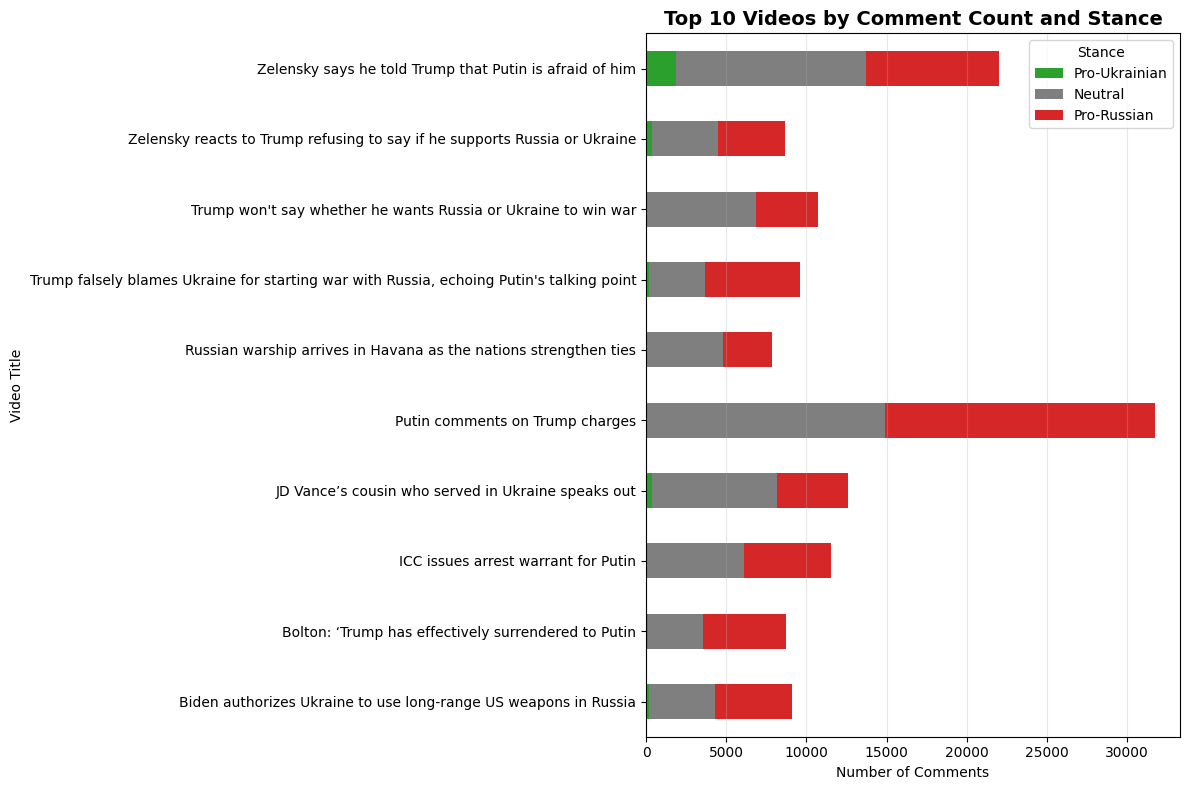

In [5]:
fig3, ax3 = plt.subplots(figsize=(12, 8))
top_videos = df['video_title'].value_counts().head(10).index
df_top = df[df['video_title'].isin(top_videos)]
cross_tab = pd.crosstab(df_top['video_title'], df_top['stance_label'])
cross_tab = cross_tab.reindex(columns=['proukrainian', 'neutral', 'prorussian'], fill_value=0)
cross_tab.plot(kind='barh', stacked=True, ax=ax3, 
              color=['#2ca02c', '#7f7f7f', '#d62728'])
ax3.set_title('Top 10 Videos by Comment Count and Stance', fontsize=14, fontweight='bold')
ax3.set_xlabel('Number of Comments')
ax3.set_ylabel('Video Title')
ax3.legend(title='Stance', labels=['Pro-Ukrainian', 'Neutral', 'Pro-Russian'])
ax3.grid(axis='x', alpha=0.3)
plt.tight_layout()
plt.savefig('stance_top_videos.png', dpi=300, bbox_inches='tight')
plt.show()

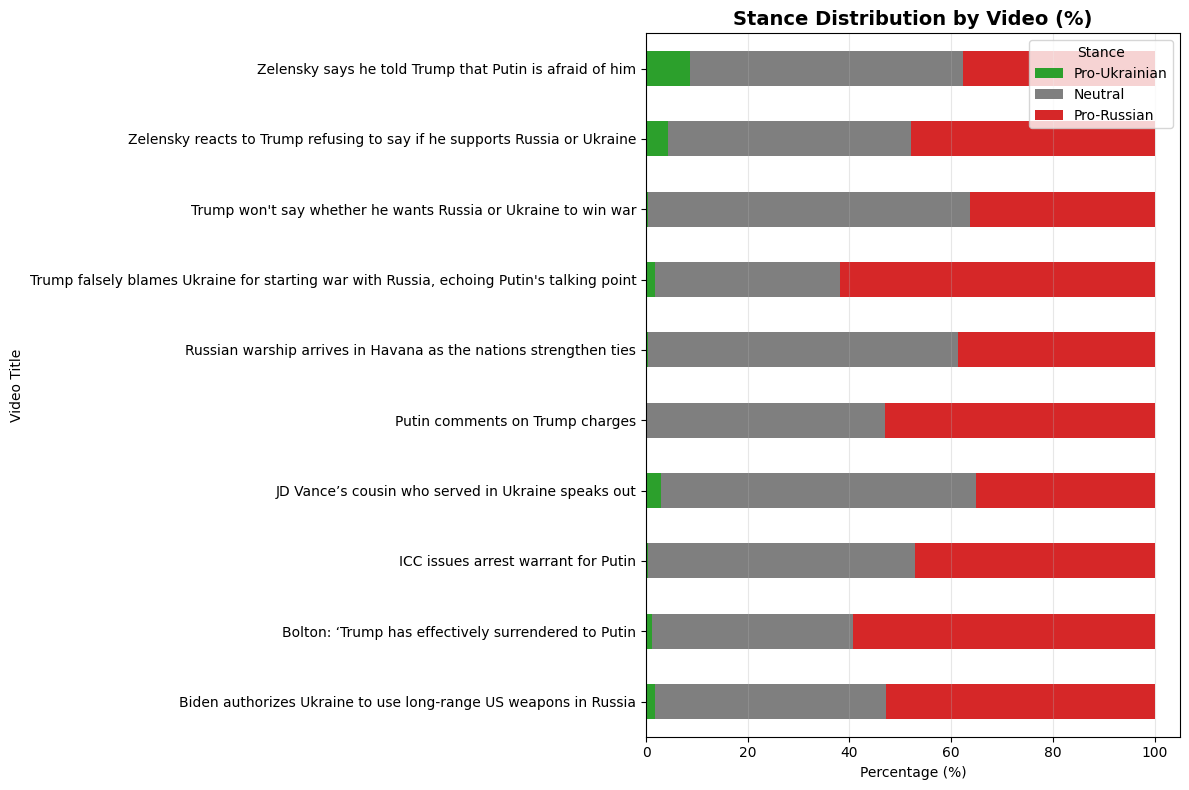

In [6]:
fig4, ax4 = plt.subplots(figsize=(12, 8))
cross_tab_pct = pd.crosstab(df_top['video_title'], df_top['stance_label'], normalize='index') * 100
cross_tab_pct = cross_tab_pct.reindex(columns=['proukrainian', 'neutral', 'prorussian'], fill_value=0)
cross_tab_pct.plot(kind='barh', stacked=True, ax=ax4,
                   color=['#2ca02c', '#7f7f7f', '#d62728'])
ax4.set_title('Stance Distribution by Video (%)', fontsize=14, fontweight='bold')
ax4.set_xlabel('Percentage (%)')
ax4.set_ylabel('Video Title')
ax4.legend(title='Stance', labels=['Pro-Ukrainian', 'Neutral', 'Pro-Russian'])
ax4.grid(axis='x', alpha=0.3)
plt.tight_layout()
plt.savefig('stance_videos_percentage.png', dpi=300, bbox_inches='tight')
plt.show()


/tmp/ipykernel_46339/3195655168.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=df_filtered, x='stance_label', y='comment_length',


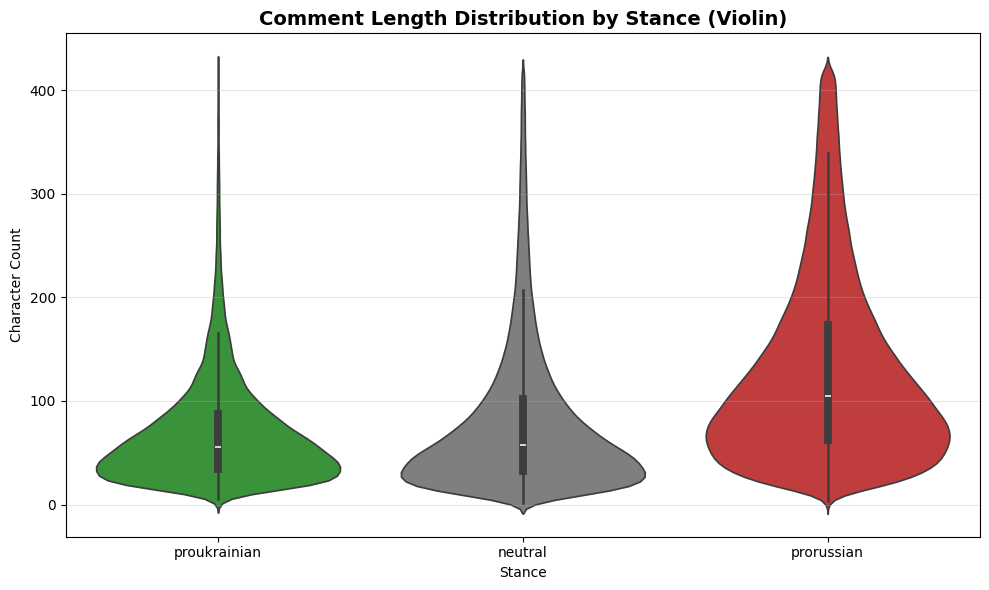

In [8]:
fig6, ax6 = plt.subplots(figsize=(10, 6))
df_filtered = df[df['comment_length'] < df['comment_length'].quantile(0.95)]
sns.violinplot(data=df_filtered, x='stance_label', y='comment_length',
               palette=colors_pie, order=stance_order, ax=ax6)
ax6.set_title('Comment Length Distribution by Stance (Violin)', fontsize=14, fontweight='bold')
ax6.set_xlabel('Stance')
ax6.set_ylabel('Character Count')
ax6.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.savefig('stance_violin_length.png', dpi=300, bbox_inches='tight')
plt.show()

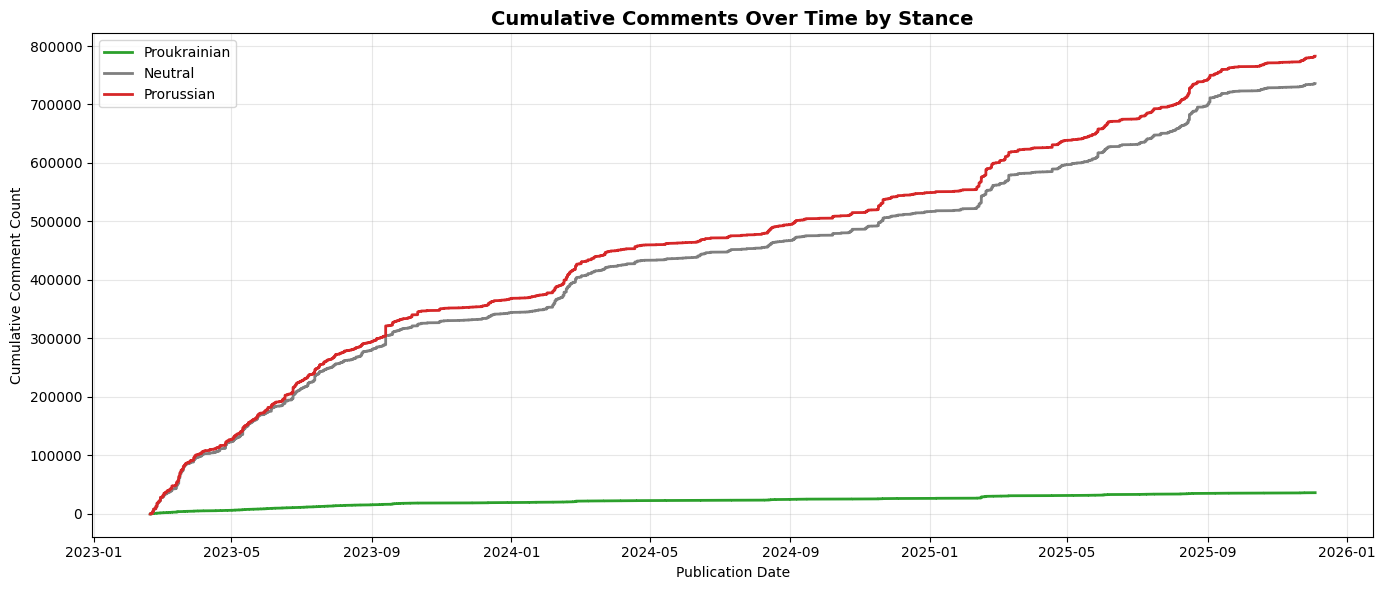

In [9]:
fig7, ax7 = plt.subplots(figsize=(14, 6))
df_sorted = df.sort_values('video_published_at')
for stance in ['proukrainian', 'neutral', 'prorussian']:
    stance_df = df_sorted[df_sorted['stance_label'] == stance]
    cumsum = np.arange(1, len(stance_df) + 1)
    ax7.plot(stance_df['video_published_at'], cumsum, 
             label=stance.capitalize(), color=colors_pie[stance], linewidth=2)
ax7.set_title('Cumulative Comments Over Time by Stance', fontsize=14, fontweight='bold')
ax7.set_xlabel('Publication Date')
ax7.set_ylabel('Cumulative Comment Count')
ax7.legend()
ax7.grid(alpha=0.3)
plt.tight_layout()
plt.savefig('stance_cumulative.png', dpi=300, bbox_inches='tight')
plt.show()